In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('precision', 3)

In [4]:
data = pd.read_csv('xAPI-Edu-Data.csv', sep=',', engine='python')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB


In [6]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [7]:
data.rename(columns={'gender': 'Gender', 
                     'NationalITy': 'Nationality', 
                     'PlaceofBirth': 'PlaceOfBirth', 
                     'raisedhands': 'RaisedHands', 
                     'VisITedResources': 'VisitedResources',
                     'ParentschoolSatisfaction': 'ParentSchoolSatisfaction'
                    }, inplace=True)

In [8]:
data.tail()

,Gender,Nationality,PlaceOfBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Class
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L
479,F,Jordan,Jordan,MiddleSchool,G-08,A,History,S,Father,35,14,23,62,No,Bad,Above-7,L


In [9]:
print(data.shape)
print(data.columns)

(480, 17)
Index(['Gender', 'Nationality', 'PlaceOfBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'RaisedHands',
       'VisitedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentSchoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


In [10]:
data.describe()

,RaisedHands,VisitedResources,AnnouncementsView,Discussion
count,480.000,480.000,480.000,480.000
mean,46.775,54.798,37.919,43.283
std,30.779,33.080,26.611,27.638
min,0.000,0.000,0.000,1.000
25%,15.750,20.000,14.000,20.000
50%,50.000,65.000,33.000,39.000
75%,75.000,84.000,58.000,70.000
max,100.000,99.000,98.000,99.000


In [11]:
data.describe(include=['object'])

,Gender,Nationality,PlaceOfBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,270,292,289,211


In [12]:
data.describe(exclude=['object'])

,RaisedHands,VisitedResources,AnnouncementsView,Discussion
count,480.000,480.000,480.000,480.000
mean,46.775,54.798,37.919,43.283
std,30.779,33.080,26.611,27.638
min,0.000,0.000,0.000,1.000
25%,15.750,20.000,14.000,20.000
50%,50.000,65.000,33.000,39.000
75%,75.000,84.000,58.000,70.000
max,100.000,99.000,98.000,99.000


# Готовим данные

In [13]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Gender', 'Nationality', 'PlaceOfBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentSchoolSatisfaction', 'StudentAbsenceDays', 'Class']
['RaisedHands', 'VisitedResources', 'AnnouncementsView', 'Discussion']


In [14]:
for c in categorical_columns:
    print("{0}: {1}".format(c, data[c].unique()))

Gender: ['M' 'F']
Nationality: ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
PlaceOfBirth: ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
StageID: ['lowerlevel' 'MiddleSchool' 'HighSchool']
GradeID: ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
SectionID: ['A' 'B' 'C']
Topic: ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
Semester: ['F' 'S']
Relation: ['Father' 'Mum']
ParentAnsweringSurvey: ['Yes' 'No']
ParentSchoolSatisfaction: ['Good' 'Bad']
StudentAbsenceDays: ['Under-7' 'Above-7']
Class: ['M' 'L' 'H']


In [15]:
data['Nationality'].replace(to_replace={'KW': 'Kuwait', 'lebanon': 'Lebanon', 'venzuela': 'Venezuela', 'Lybia': 'Libya'}, 
                            inplace=True)
data['PlaceOfBirth'].replace(to_replace={'KuwaIT': 'Kuwait', 'lebanon': 'Lebanon', 'venzuela': 'Venezuela', 'Lybia': 'Libya'}, 
                             inplace=True)
data['StageID'].replace(to_replace={'lowerlevel': 'Lowerlevel'}, inplace=True)
data['Relation'].replace(to_replace={'Mum': 'Mother'}, inplace=True)

In [16]:
for c in categorical_columns:
    print("{0}: {1}".format(c, data[c].unique()))

Gender: ['M' 'F']
Nationality: ['Kuwait' 'Lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'Venezuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Libya']
PlaceOfBirth: ['Kuwait' 'Lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'Venezuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Libya']
StageID: ['Lowerlevel' 'MiddleSchool' 'HighSchool']
GradeID: ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
SectionID: ['A' 'B' 'C']
Topic: ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
Semester: ['F' 'S']
Relation: ['Father' 'Mother']
ParentAnsweringSurvey: ['Yes' 'No']
ParentSchoolSatisfaction: ['Good' 'Bad']
StudentAbsenceDays: ['Under-7' 'Above-7']
Class: ['M' 'L' 'H']


Проверим, есть ли пропущенные значения

In [17]:
print(data.isnull().values.sum()) # number of NaN-values in the dataset

0


In [18]:
data[categorical_columns].count(axis=0)

Gender                      480
Nationality                 480
PlaceOfBirth                480
StageID                     480
GradeID                     480
SectionID                   480
Topic                       480
Semester                    480
Relation                    480
ParentAnsweringSurvey       480
ParentSchoolSatisfaction    480
StudentAbsenceDays          480
Class                       480
dtype: int64

In [19]:
data[numerical_columns].count(axis=0)

RaisedHands          480
VisitedResources     480
AnnouncementsView    480
Discussion           480
dtype: int64

# Визуализация

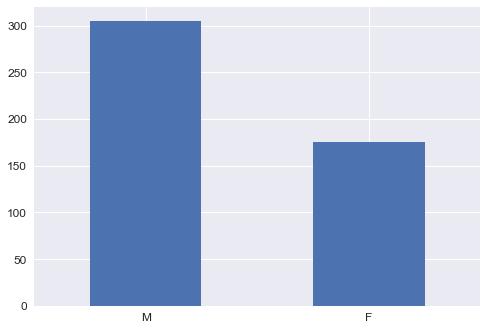

In [20]:
data['Gender'].value_counts().plot(kind='bar', rot=0, fontsize=12);

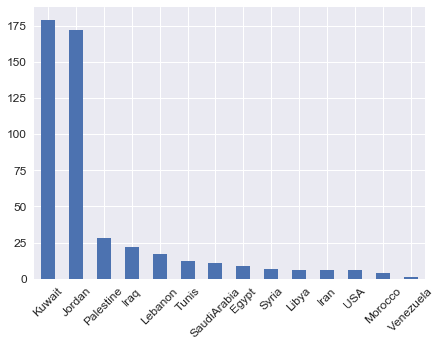

In [21]:
data['Nationality'].value_counts().plot(kind='bar', rot=45, figsize=(7, 5), fontsize=12);

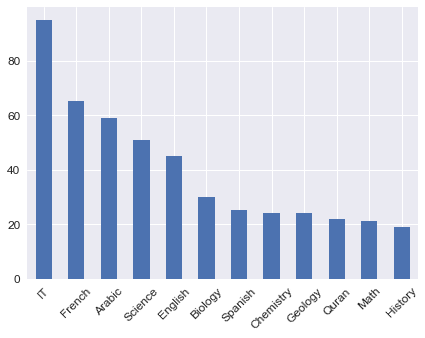

In [22]:
data['Topic'].value_counts().plot(kind='bar', rot=45, figsize=(7, 5), fontsize=12);

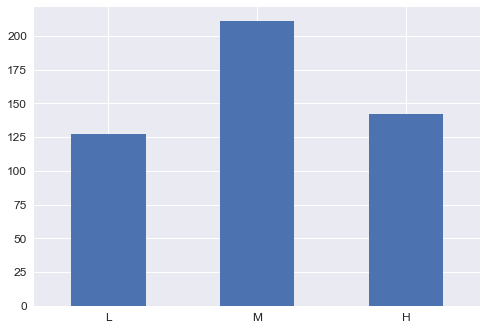

In [23]:
data['Class'].value_counts().loc[list('LMH')].plot(kind='bar', rot=0, fontsize=12);

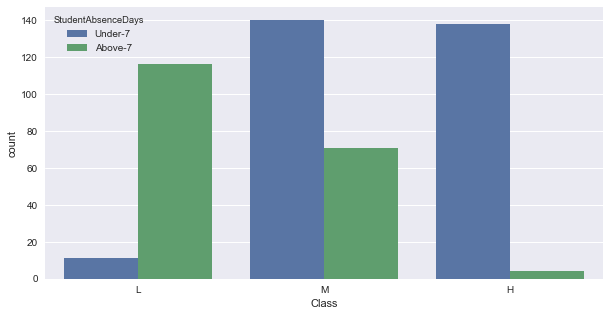

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Class", hue="StudentAbsenceDays", data=data, order=['L', 'M', 'H']);

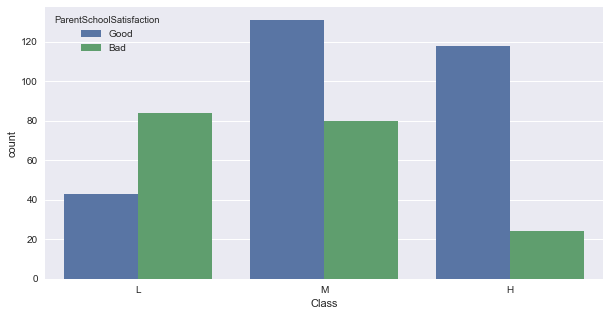

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Class", hue="ParentSchoolSatisfaction", data=data, order=['L', 'M', 'H']);

## Векторизация

In [26]:
binary_columns    = [c for c in categorical_columns if len(data[c].unique()) == 2]
nonbinary_columns = [c for c in categorical_columns if len(data[c].unique()) > 2]
print(binary_columns)
print(nonbinary_columns)

['Gender', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentSchoolSatisfaction', 'StudentAbsenceDays']
['Nationality', 'PlaceOfBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Class']


In [27]:
data.at[data['Gender'] == 'F', 'Gender'] = 0
data.at[data['Gender'] == 'M', 'Gender'] = 1

In [28]:
data['Gender'].describe()

count     480
unique      2
top         1
freq      305
Name: Gender, dtype: int64

In [29]:
data.at[data['Semester'] == 'F', 'Semester'] = 0
data.at[data['Semester'] == 'S', 'Semester'] = 1

In [30]:
data['Semester'].describe()

count     480
unique      2
top         0
freq      245
Name: Semester, dtype: int64

In [31]:
data.at[data['Relation'] == 'Mother', 'Relation'] = 0
data.at[data['Relation'] == 'Father', 'Relation'] = 1

In [32]:
data['Relation'].describe()

count     480
unique      2
top         1
freq      283
Name: Relation, dtype: int64

In [33]:
data.at[data['ParentAnsweringSurvey'] == 'No', 'ParentAnsweringSurvey'] = 0
data.at[data['ParentAnsweringSurvey'] == 'Yes', 'ParentAnsweringSurvey'] = 1

In [34]:
data['ParentAnsweringSurvey'].describe()

count     480
unique      2
top         1
freq      270
Name: ParentAnsweringSurvey, dtype: int64

In [35]:
data.at[data['ParentSchoolSatisfaction'] == 'Bad', 'ParentSchoolSatisfaction'] = 0
data.at[data['ParentSchoolSatisfaction'] == 'Good', 'ParentSchoolSatisfaction'] = 1

In [36]:
data['ParentSchoolSatisfaction'].describe()

count     480
unique      2
top         1
freq      292
Name: ParentSchoolSatisfaction, dtype: int64

In [37]:
data.at[data['StudentAbsenceDays'] == 'Under-7', 'StudentAbsenceDays'] = 0
data.at[data['StudentAbsenceDays'] == 'Above-7', 'StudentAbsenceDays'] = 1

In [38]:
data['StudentAbsenceDays'].describe()

count     480
unique      2
top         0
freq      289
Name: StudentAbsenceDays, dtype: int64

In [39]:
data['StudentAbsenceDays'].unique()

array([0, 1], dtype=object)

In [40]:
print(nonbinary_columns)

['Nationality', 'PlaceOfBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Class']


In [41]:
nonbinary_columns.remove('Class')

In [42]:
class_column = data['Class']

In [43]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Nationality_Egypt', 'Nationality_Iran', 'Nationality_Iraq',
       'Nationality_Jordan', 'Nationality_Kuwait', 'Nationality_Lebanon',
       'Nationality_Libya', 'Nationality_Morocco', 'Nationality_Palestine',
       'Nationality_SaudiArabia', 'Nationality_Syria', 'Nationality_Tunis',
       'Nationality_USA', 'Nationality_Venezuela', 'PlaceOfBirth_Egypt',
       'PlaceOfBirth_Iran', 'PlaceOfBirth_Iraq', 'PlaceOfBirth_Jordan',
       'PlaceOfBirth_Kuwait', 'PlaceOfBirth_Lebanon', 'PlaceOfBirth_Libya',
       'PlaceOfBirth_Morocco', 'PlaceOfBirth_Palestine',
       'PlaceOfBirth_SaudiArabia', 'PlaceOfBirth_Syria', 'PlaceOfBirth_Tunis',
       'PlaceOfBirth_USA', 'PlaceOfBirth_Venezuela', 'StageID_HighSchool',
       'StageID_Lowerlevel', 'StageID_MiddleSchool', 'GradeID_G-02',
       'GradeID_G-04', 'GradeID_G-05', 'GradeID_G-06', 'GradeID_G-07',
       'GradeID_G-08', 'GradeID_G-09', 'GradeID_G-10', 'GradeID_G-11',
       'GradeID_G-12', 'SectionID_A', 'SectionID_B', 'SectionID

## Нормализация количественных признаков

In [44]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,RaisedHands,VisitedResources,AnnouncementsView,Discussion
count,480.000,480.000,480.000,480.000
mean,46.775,54.798,37.919,43.283
std,30.779,33.080,26.611,27.638
min,0.000,0.000,0.000,1.000
25%,15.750,20.000,14.000,20.000
50%,50.000,65.000,33.000,39.000
75%,75.000,84.000,58.000,70.000
max,100.000,99.000,98.000,99.000


In [45]:
data_numerical = (data_numerical - data_numerical.mean(axis=0)) / data_numerical.std(axis=0)

In [46]:
data_numerical.describe()

,RaisedHands,VisitedResources,AnnouncementsView,Discussion
count,4.800e+02,4.800e+02,4.800e+02,4.800e+02
mean,1.488e-16,-1.943e-17,8.465e-17,2.197e-17
std,1.000e+00,1.000e+00,1.000e+00,1.000e+00
min,-1.520e+00,-1.657e+00,-1.425e+00,-1.530e+00
25%,-1.008e+00,-1.052e+00,-8.988e-01,-8.424e-01
50%,1.048e-01,3.084e-01,-1.848e-01,-1.550e-01
75%,9.170e-01,8.828e-01,7.546e-01,9.667e-01
max,1.729e+00,1.336e+00,2.258e+00,2.016e+00


## Соединяем все в одну таблицу

In [47]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis=1)
print(data.shape)

(480, 66)


In [48]:
data.describe()

,RaisedHands,VisitedResources,AnnouncementsView,Discussion,Nationality_Egypt,Nationality_Iran,Nationality_Iraq,Nationality_Jordan,Nationality_Kuwait,Nationality_Lebanon,...,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish
count,4.800e+02,4.800e+02,4.800e+02,4.800e+02,480.000,480.000,480.000,480.000,480.000,480.000,...,480.000,480.000,480.000,480.000,480.000,480.000,480.000,480.000,480.000,480.000
mean,1.488e-16,-1.943e-17,8.465e-17,2.197e-17,0.019,0.013,0.046,0.358,0.373,0.035,...,0.050,0.094,0.135,0.050,0.040,0.198,0.044,0.046,0.106,0.052
std,1.000e+00,1.000e+00,1.000e+00,1.000e+00,0.136,0.111,0.209,0.480,0.484,0.185,...,0.218,0.292,0.343,0.218,0.195,0.399,0.205,0.209,0.308,0.222
min,-1.520e+00,-1.657e+00,-1.425e+00,-1.530e+00,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,-1.008e+00,-1.052e+00,-8.988e-01,-8.424e-01,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.048e-01,3.084e-01,-1.848e-01,-1.550e-01,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,9.170e-01,8.828e-01,7.546e-01,9.667e-01,0.000,0.000,0.000,1.000,1.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,1.729e+00,1.336e+00,2.258e+00,2.016e+00,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


## Classification

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

from math import sqrt

In [50]:
def get_errors(classifier, train_test_split_data):
    x_train, x_test, y_train, y_test = train_test_split_data
    
    error_train = np.mean(y_train != classifier.predict(x_train))
    error_test = np.mean(y_test != classifier.predict(x_test))
    
    return error_train, error_test

In [51]:
def print_errors(error_train, error_test):
    print("Train error: {0:.3g}\nTest error: {1:.3g}".format(error_train.item(), error_test.item()))

In [52]:
def plot_errors(classifier_name, parameter_name, parameter_values, train_errors, test_errors, cv_errors):
    fontsize = 15
    plt.plot(parameter_values, train_errors, '.-', label='Train error')
    plt.plot(parameter_values, test_errors, '.-', label='Test error')
    plt.plot(parameter_values, cv_errors, '.-', label='CV error')
    plt.title(classifier_name, size=fontsize)
    plt.xlabel(parameter_name, size=fontsize)
    plt.xticks(size=fontsize)
    plt.ylabel('Error', size=fontsize)
    plt.yticks(size=fontsize)
    plt.legend(fontsize=fontsize);

In [53]:
def tune_model_parameter(classifier_name, classifier, parameter_name, parameter_values, train_test_split_data):
    x_train, x_test, y_train, y_test = train_test_split_data
    train_errors, test_errors, cv_errors = [], [], []
    
    for i in parameter_values:
#         print('{0}: {1:.4g}'.format(parameter_name, i))
        clf = classifier.set_params(**{parameter_name: i})
        clf.fit(x_train, y_train)
        
        train_error, test_error = get_errors(clf, train_test_split_data)
        train_errors.append(train_error)
        test_errors.append(test_error)
        
        cv = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=13)
        scores = cross_val_score(clf, x, y, cv=cv, scoring='accuracy')
        cv_errors.append(1 - scores.mean())
    
    min_cv_error = min(cv_errors)
    optimal_parameter_value = parameter_values[cv_errors.index(min_cv_error)]
    print('Min CV-error: {0:.3g} ({1}: {2:.3g})'.format(min_cv_error, parameter_name,  optimal_parameter_value))

    plot_errors(classifier_name, parameter_name, parameter_values, train_errors, test_errors, cv_errors)
    
    return optimal_parameter_value

In [54]:
def save_results(classifier_name, classifier, results):
    train_error, test_error = get_errors(classifier, train_test_split_data)
    results.loc[classifier_name] = [train_error, test_error]
    print_errors(train_error, test_error)

In [55]:
x = data
y = class_column
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)
train_test_split_data = list((x_train, x_test, y_train, y_test))

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(336, 66) (144, 66)
(336,) (144,)


In [56]:
results = pd.DataFrame([], columns=['Train Error', 'Test Error'])

# kNN

Min CV-error: 0.289 (n_neighbors: 1)


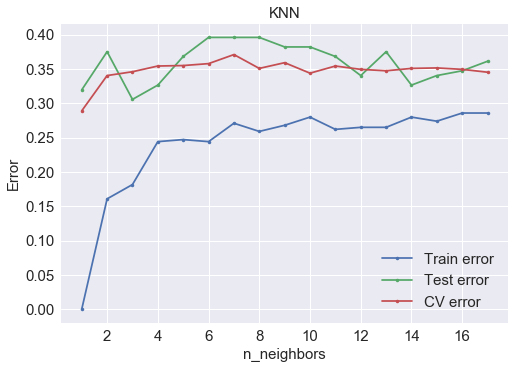

Train error: 0
Test error: 0.319


In [57]:
n_neighbors = range(1, int(sqrt(x_train.shape[0])))
best_k = tune_model_parameter('KNN', KNeighborsClassifier(), 'n_neighbors', n_neighbors, train_test_split_data)
knn = KNeighborsClassifier(n_neighbors=best_k).fit(x_train, y_train)
plt.show()
save_results('KNN', knn, results)

# LDA

In [58]:
lda = LinearDiscriminantAnalysis().fit(x_train, y_train)
save_results('LDA', lda, results)

Train error: 0.164
Test error: 0.306


# QDA

Min CV-error: 0.315 (reg_param: 0.5)


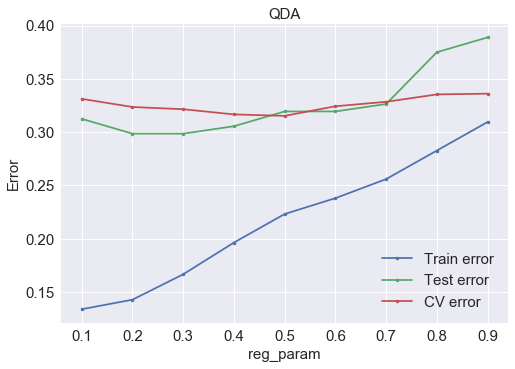

Train error: 0.223
Test error: 0.319


In [59]:
reg_param = np.arange(0.1, 1.0, 0.1)
best_reg_param = tune_model_parameter('QDA', QuadraticDiscriminantAnalysis(), 'reg_param', reg_param, train_test_split_data)
qda = QuadraticDiscriminantAnalysis(reg_param=best_reg_param).fit(x_train, y_train)
plt.show()
save_results('QDA', qda, results)

# Logistic Regression

Min CV-error: 0.277 (C: 0.7)


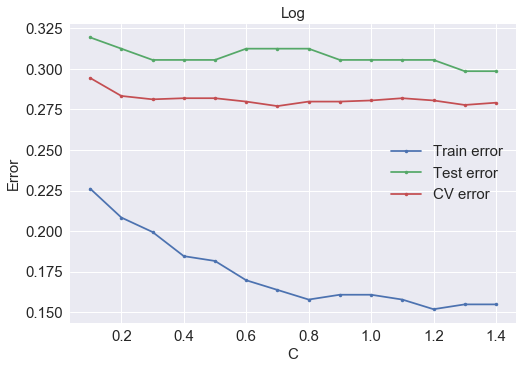

Train error: 0.164
Test error: 0.312


In [60]:
log_C = np.arange(0.1, 1.5, 0.1)
best_log_C = tune_model_parameter('Log', LogisticRegression(), 'C', log_C, train_test_split_data)
log = LogisticRegression(C=best_log_C).fit(x_train, y_train)
plt.show()
save_results('LOG', log, results)

# SVC

Min CV-error: 0.238 (C: 2)


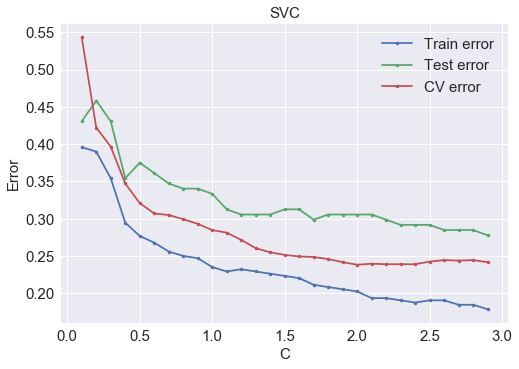

Train error: 0.202
Test error: 0.306


In [61]:
svc_C = np.arange(0.1, 3, 0.1)
best_svc_C = tune_model_parameter('SVC', SVC(), 'C', svc_C, train_test_split_data)
svc = SVC(C=best_svc_C).fit(x_train, y_train)
train_error, test_error = get_errors(svc, train_test_split_data)
plt.show()
print_errors(train_error, test_error)

Min CV-error: 0.237 (gamma: 0.19)


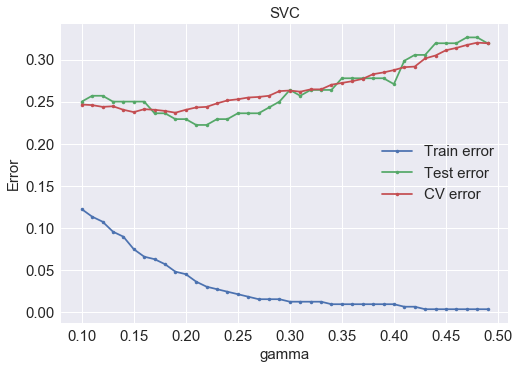

Train error: 0.0476
Test error: 0.229


In [62]:
gamma_array = np.arange(0.1, 0.5, 0.01)
best_svc_gamma = tune_model_parameter('SVC', SVC(), 'gamma', gamma_array, train_test_split_data)
svc = SVC(gamma=best_svc_gamma)
svc.fit(x_train, y_train)
train_error, test_error = get_errors(svc, train_test_split_data)
plt.show()
print_errors(train_error, test_error)

In [63]:
svc = SVC(gamma=best_svc_gamma, C=best_svc_C).fit(x_train, y_train)
save_results('SVC', svc, results)

Train error: 0.00893
Test error: 0.208


# Naive Bayes

In [64]:
gnb = GaussianNB().fit(x_train, y_train)
save_results('GNB', gnb, results)

Train error: 0.473
Test error: 0.542


In [65]:
bnb = BernoulliNB().fit(x_train, y_train)
save_results('BNB', bnb, results)

Train error: 0.247
Test error: 0.375


# Random Forest

Min CV-error: 0.207 (n_estimators: 100)


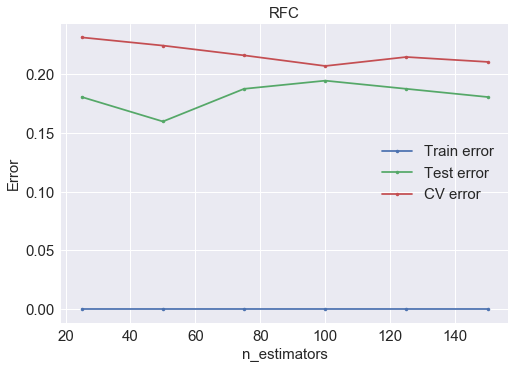

Train error: 0
Test error: 0.181


In [66]:
rfc_n_estimators = range(25, 151, 25)
best_rfc_n_estimators = tune_model_parameter('RFC', RandomForestClassifier(), 'n_estimators', rfc_n_estimators, train_test_split_data)
rfc = RandomForestClassifier(n_estimators=best_rfc_n_estimators).fit(x_train, y_train)
plt.show()
save_results('RFC', rfc, results)

# Extremely Randomized Trees

Min CV-error: 0.216 (n_estimators: 150)


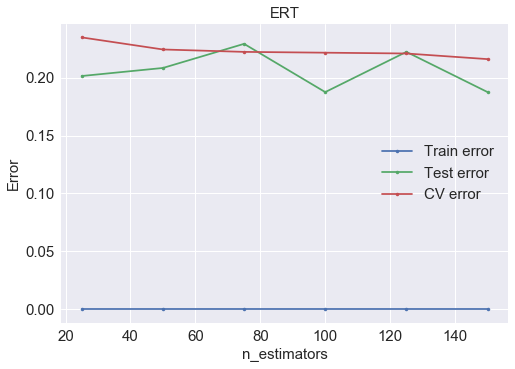

Train error: 0
Test error: 0.215


In [67]:
ert_n_estimators = range(25, 151, 25)
best_ert_n_estimators = tune_model_parameter('ERT', ExtraTreesClassifier(), 'n_estimators', ert_n_estimators, train_test_split_data)
ert = ExtraTreesClassifier(n_estimators=best_ert_n_estimators).fit(x_train, y_train)
plt.show()
save_results('ERT', ert, results)

# AdaBoost

Min CV-error: 0.301 (n_estimators: 100)


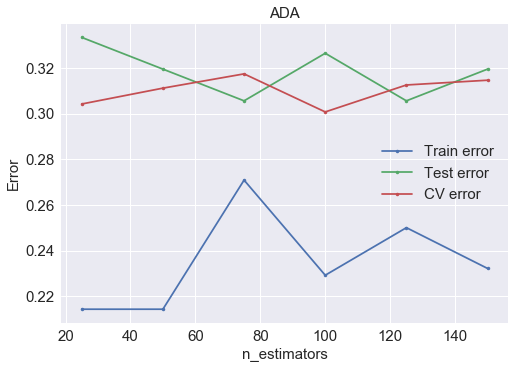

Train error: 0.229
Test error: 0.326


In [68]:
ada_n_estimators = range(25, 151, 25)
best_ada_n_estimators = tune_model_parameter('ADA', AdaBoostClassifier(), 'n_estimators', ada_n_estimators, train_test_split_data)
ada = AdaBoostClassifier(n_estimators=best_ada_n_estimators).fit(x_train, y_train)
plt.show()
save_results('ADA', ada, results)

# GBT

Min CV-error: 0.247 (n_estimators: 50)


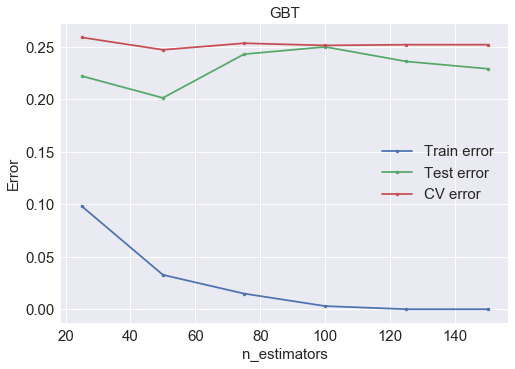

Train error: 0.0327
Test error: 0.201


In [69]:
gbt_n_estimators = range(25, 151, 25)
best_gbt_n_estimators = tune_model_parameter('GBT', GradientBoostingClassifier(), 'n_estimators', gbt_n_estimators, train_test_split_data)
gbt = GradientBoostingClassifier(n_estimators=best_gbt_n_estimators).fit(x_train, y_train)
plt.show()
save_results('GBT', gbt, results)

# Results

In [70]:
results.sort_values(by='Test Error', inplace=True)

In [71]:
results

,Train Error,Test Error
RFC,0.000,0.181
GBT,0.033,0.201
SVC,0.009,0.208
ERT,0.000,0.215
LDA,0.164,0.306
LOG,0.164,0.312
KNN,0.000,0.319
QDA,0.223,0.319
ADA,0.229,0.326
BNB,0.247,0.375


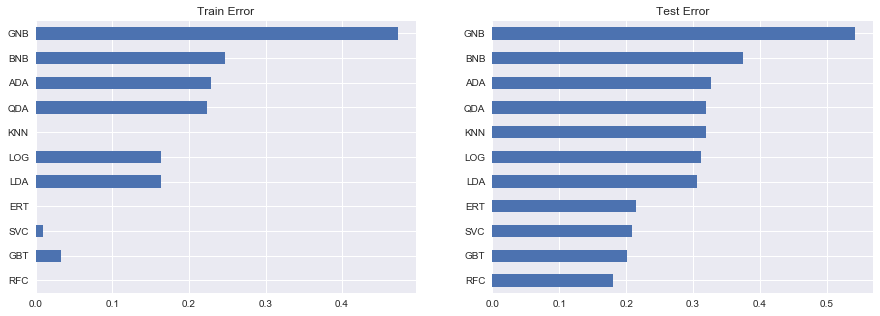

In [72]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
results['Train Error'].plot(kind='barh', title='Train Error', ax=ax1)
results['Test Error'].plot(kind='barh', title='Test Error', ax=ax2);

### Значимость признаков

In [73]:
feature_names = x.columns.values

In [74]:
dtc = DecisionTreeClassifier().fit(x_train, y_train)
train_error, test_error = get_errors(dtc, train_test_split_data)
print_errors(train_error, test_error)

Train error: 0
Test error: 0.326


In [75]:
importances = dtc.feature_importances_
indices = np.argsort(importances)[::-1]

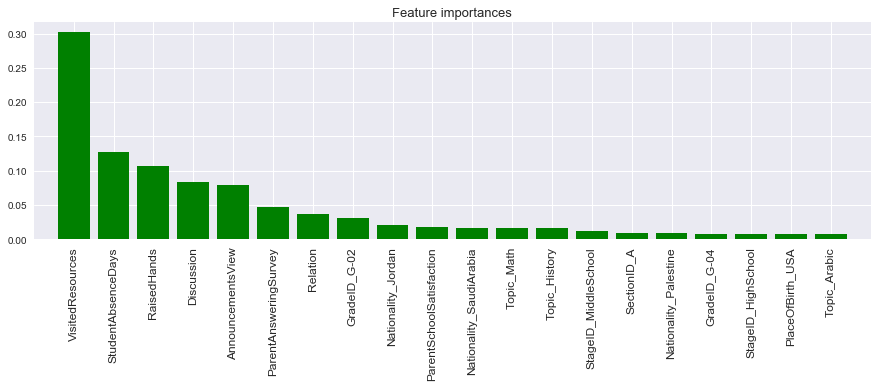

In [76]:
d_first = 20
plt.figure(figsize=(15, 4))
plt.title("Feature importances", fontsize=13)
plt.bar(range(d_first), importances[indices[:d_first]], align='center', color='g')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation=90, fontsize=12)
plt.xlim([-1, d_first]);

In [77]:
selected_features = feature_names[indices[:7]]
selected_features

array(['VisitedResources', 'StudentAbsenceDays', 'RaisedHands',
       'Discussion', 'AnnouncementsView', 'ParentAnsweringSurvey',
       'Relation'], dtype=object)

In [78]:
reduced_data = data[selected_features]

In [79]:
reduced_data.head()

,VisitedResources,StudentAbsenceDays,RaisedHands,Discussion,AnnouncementsView,ParentAnsweringSurvey,Relation
0,-1.173,0,-1.032,-0.842,-1.350,1,1
1,-1.052,0,-0.870,-0.662,-1.312,1,1
2,-1.445,1,-1.195,-0.481,-1.425,0,1
3,-0.901,1,-0.545,-0.300,-1.237,0,1
4,-0.145,1,-0.220,0.243,-0.974,0,1


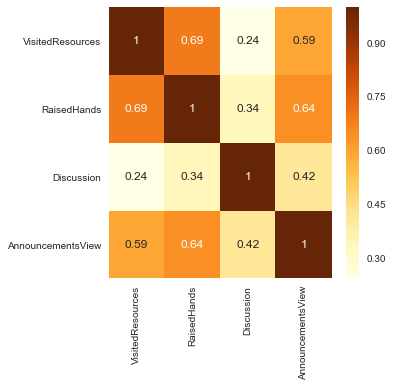

In [80]:
corr = reduced_data.corr()
columns_names = corr.columns.values
plt.figure(figsize=(5, 5))
sns.heatmap(corr, xticklabels=columns_names, yticklabels=columns_names, cmap="YlOrBr", annot=True);

In [81]:
x = reduced_data
y = class_column
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)
train_test_split_data = list((x_train, x_test, y_train, y_test))

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(336, 7) (144, 7)
(336,) (144,)


In [82]:
results_after_reducing = pd.DataFrame([], columns=['Train Error', 'Test Error'])

Посмотрим на результаты тех же классификаторов после уменьшения кол-ва признаков.

# kNN

Min CV-error: 0.276 (n_neighbors: 13)


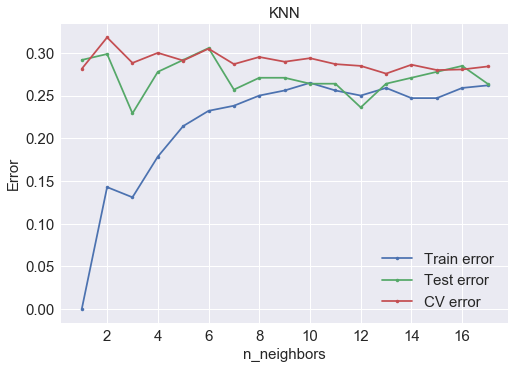

Train error: 0.259
Test error: 0.264


In [83]:
n_neighbors = range(1, int(sqrt(x_train.shape[0])))
best_k = tune_model_parameter('KNN', KNeighborsClassifier(), 'n_neighbors', n_neighbors, train_test_split_data)
knn = KNeighborsClassifier(n_neighbors=best_k).fit(x_train, y_train)
plt.show()
save_results('KNN', knn, results_after_reducing)

# LDA

In [84]:
lda = LinearDiscriminantAnalysis().fit(x_train, y_train)
save_results('LDA', lda, results_after_reducing)

Train error: 0.214
Test error: 0.299


# QDA

Min CV-error: 0.287 (reg_param: 0.1)


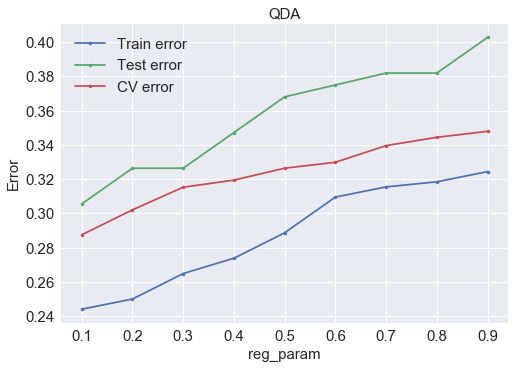

Train error: 0.244
Test error: 0.306


In [85]:
reg_param = np.arange(0.1, 1.0, 0.1)
best_reg_param = tune_model_parameter('QDA', QuadraticDiscriminantAnalysis(), 'reg_param', reg_param, train_test_split_data)
qda = QuadraticDiscriminantAnalysis(reg_param=best_reg_param).fit(x_train, y_train)
plt.show()
save_results('QDA', qda, results_after_reducing)

# Logistic Regression

Min CV-error: 0.29 (C: 1.4)


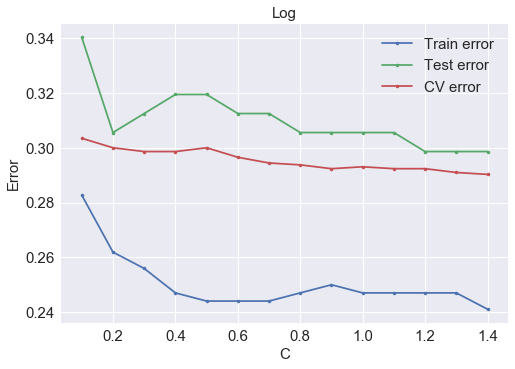

Train error: 0.241
Test error: 0.299


In [86]:
log_C = np.arange(0.1, 1.5, 0.1)
best_log_C = tune_model_parameter('Log', LogisticRegression(), 'C', log_C, train_test_split_data)
log = LogisticRegression(C=best_log_C).fit(x_train, y_train)
plt.show()
save_results('LOG', log, results_after_reducing)

# SVC

Min CV-error: 0.256 (C: 0.8)


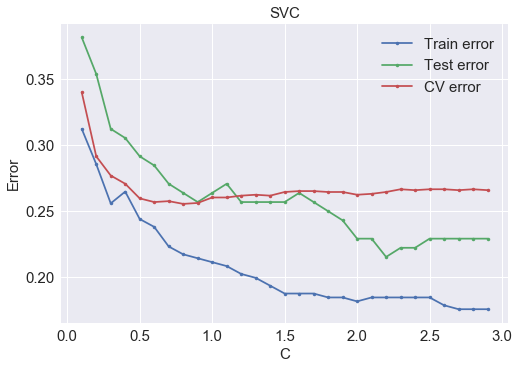

Train error: 0.217
Test error: 0.264


In [87]:
svc_C = np.arange(0.1, 3, 0.1)
best_svc_C = tune_model_parameter('SVC', SVC(), 'C', svc_C, train_test_split_data)
svc = SVC(C=best_svc_C).fit(x_train, y_train)
train_error, test_error = get_errors(svc, train_test_split_data)
plt.show()
print_errors(train_error, test_error)

Min CV-error: 0.244 (gamma: 0.49)


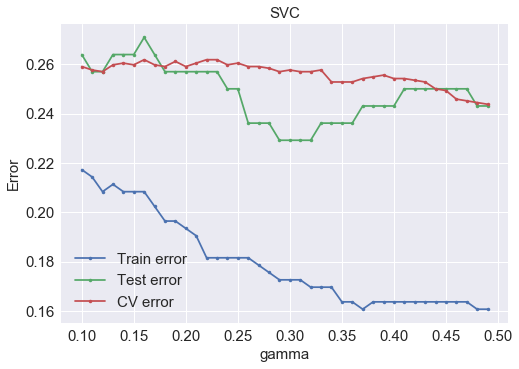

Train error: 0.161
Test error: 0.243


In [88]:
gamma_array = np.arange(0.1, 0.5, 0.01)
best_svc_gamma = tune_model_parameter('SVC', SVC(), 'gamma', gamma_array, train_test_split_data)
svc = SVC(gamma=best_svc_gamma).fit(x_train, y_train)
train_error, test_error = get_errors(svc, train_test_split_data)
plt.show()
print_errors(train_error, test_error)

In [89]:
svc = SVC(gamma=best_svc_gamma, C=best_svc_C).fit(x_train, y_train)
save_results('SVC', svc, results_after_reducing)

Train error: 0.158
Test error: 0.25


# Naive Bayes

In [90]:
gnb = GaussianNB().fit(x_train, y_train)
save_results('GNB', gnb, results_after_reducing)

Train error: 0.256
Test error: 0.271


In [91]:
bnb = BernoulliNB().fit(x_train, y_train)
save_results('BNB', bnb, results_after_reducing)

Train error: 0.259
Test error: 0.319


# Random Forest

Min CV-error: 0.231 (n_estimators: 100)


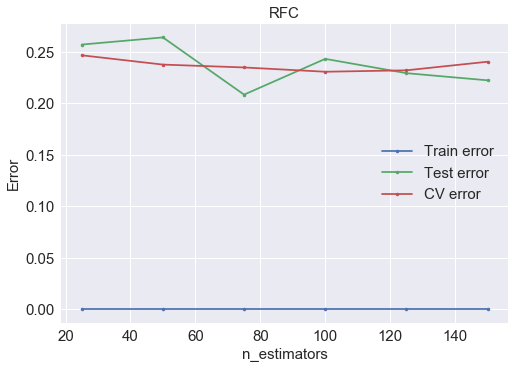

Train error: 0
Test error: 0.208


In [92]:
rfc_n_estimators = range(25, 151, 25)
best_rfc_n_estimators = tune_model_parameter('RFC', RandomForestClassifier(), 'n_estimators', rfc_n_estimators, train_test_split_data)
rfc = RandomForestClassifier(n_estimators=best_rfc_n_estimators).fit(x_train, y_train)
plt.show()
save_results('RFC', rfc, results_after_reducing)

# Extremely Randomized Trees

Min CV-error: 0.226 (n_estimators: 125)


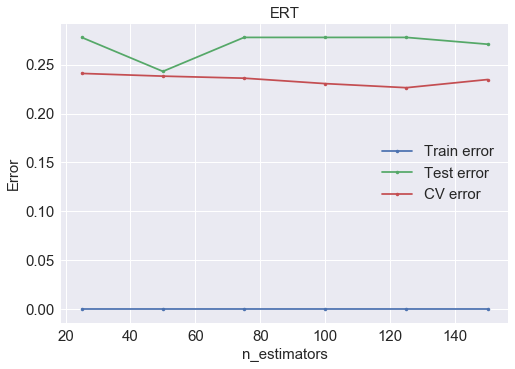

Train error: 0
Test error: 0.264


In [93]:
ert_n_estimators = range(25, 151, 25)
best_ert_n_estimators = tune_model_parameter('ERT', ExtraTreesClassifier(), 'n_estimators', ert_n_estimators, train_test_split_data)
ert = ExtraTreesClassifier(n_estimators=best_ert_n_estimators).fit(x_train, y_train)
plt.show()
save_results('ERT', ert, results_after_reducing)

# AdaBoost

Min CV-error: 0.306 (n_estimators: 150)


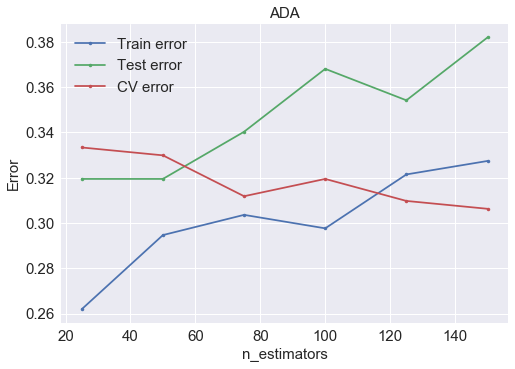

Train error: 0.327
Test error: 0.382


In [94]:
ada_n_estimators = range(25, 151, 25)
best_ada_n_estimators = tune_model_parameter('ADA', AdaBoostClassifier(), 'n_estimators', ada_n_estimators, train_test_split_data)
ada = AdaBoostClassifier(n_estimators=best_ada_n_estimators).fit(x_train, y_train)
plt.show()
save_results('ADA', ada, results_after_reducing)

# GBT

Min CV-error: 0.253 (n_estimators: 50)


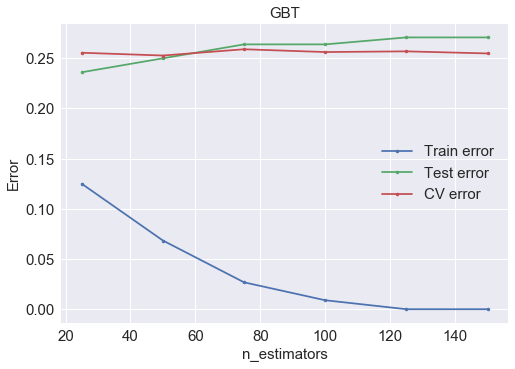

Train error: 0.0685
Test error: 0.25


In [95]:
gbt_n_estimators = range(25, 151, 25)
best_gbt_n_estimators = tune_model_parameter('GBT', GradientBoostingClassifier(), 'n_estimators', gbt_n_estimators, train_test_split_data)
gbt = GradientBoostingClassifier(n_estimators=best_gbt_n_estimators).fit(x_train, y_train)
plt.show()
save_results('GBT', gbt, results_after_reducing)

# Results after reducing a number of features

In [96]:
results_after_reducing.sort_values(by='Test Error', inplace=True)

In [97]:
results_after_reducing

,Train Error,Test Error
RFC,0.000,0.208
SVC,0.158,0.250
GBT,0.068,0.250
KNN,0.259,0.264
ERT,0.000,0.264
GNB,0.256,0.271
LDA,0.214,0.299
LOG,0.241,0.299
QDA,0.244,0.306
BNB,0.259,0.319


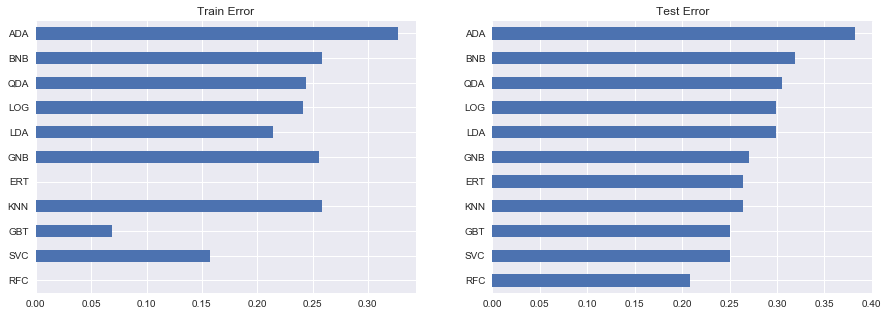

In [98]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
results_after_reducing['Train Error'].plot(kind='barh', title='Train Error', ax=ax1)
results_after_reducing['Test Error'].plot(kind='barh', title='Test Error', ax=ax2);

In [99]:
all_results = results.sort_index().join(results_after_reducing.sort_index(), rsuffix=' AR')
all_results['Test Error Change, %'] = 100 * (all_results['Test Error AR'] - all_results['Test Error']) / all_results['Test Error']

In [100]:
all_results.sort_values(by='Test Error Change, %')

,Train Error,Test Error,Train Error AR,Test Error AR,"Test Error Change, %"
GNB,0.473,0.542,0.256,0.271,-50.000
KNN,0.000,0.319,0.259,0.264,-17.391
BNB,0.247,0.375,0.259,0.319,-14.815
LOG,0.164,0.312,0.241,0.299,-4.444
QDA,0.223,0.319,0.244,0.306,-4.348
LDA,0.164,0.306,0.214,0.299,-2.273
RFC,0.000,0.181,0.000,0.208,15.385
ADA,0.229,0.326,0.327,0.382,17.021
SVC,0.009,0.208,0.158,0.250,20.000
ERT,0.000,0.215,0.000,0.264,22.581
